# Prédiction du Risque de Diabète par Analyse Clinique et Modèles d'Apprentissage Automatique

## Chargement et pretraitement des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("dataset.csv")

In [4]:
data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [5]:
data = data.rename(columns={'Unnamed: 0': 'index_tab'})

In [29]:
data.head()

,index_tab,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index_tab                 768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.shape
print(f"Le tableau contient {data.shape[0]} lignes et {data.shape[1]} colonnes ")
nb_lignes_init=data.shape[0]

Le tableau contient 768 lignes et 9 colonnes 


In [9]:
data.isna().sum()

index_tab                   0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [10]:
doublons=data.duplicated().sum()
print(doublons)

0


## Analyse de la distribution des variables numériques

Matrice de correlation

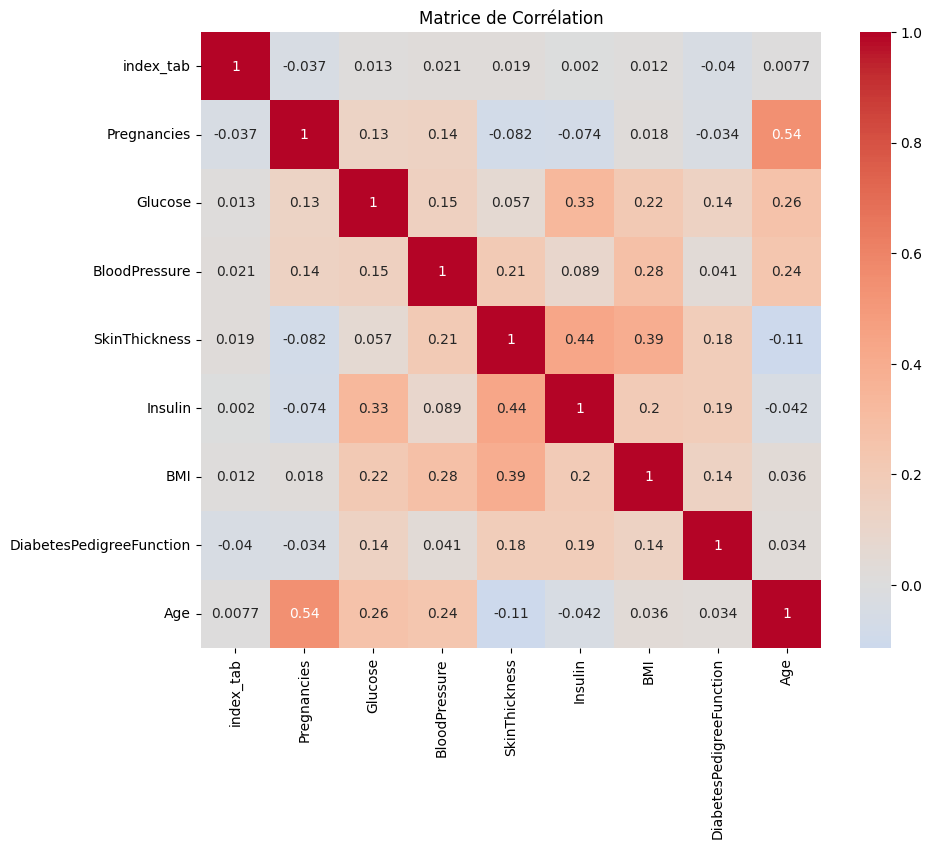

In [11]:
corr_matrix = data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

Pregnancies

Dans les ensembles de données sur le diabète (comme le Pima Indians Diabetes Dataset), la variable Pregnancies (grossesses) représente le nombre de fois où une femme a été enceinte, peu importe le nombre d'enfants nés vivants.

Nombre total de grossesses, y compris les fausses couches, les grossesses extra-utérines ou les naissances vivantes.

Valeurs observées (0–17) :

0 : Femme jamais enceinte.

1–4 : Grossesses typiques dans la population générale.

≥5 : Grossesses multiples (possible dans certains contextes, surtout pour les femmes plus âgées).

17 : Valeur extrême, possible mais rare (erreur de saisie ?).

Piste: a recouper avec les ages

In [12]:
data['Pregnancies'].value_counts().sort_index()

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: count, dtype: int64

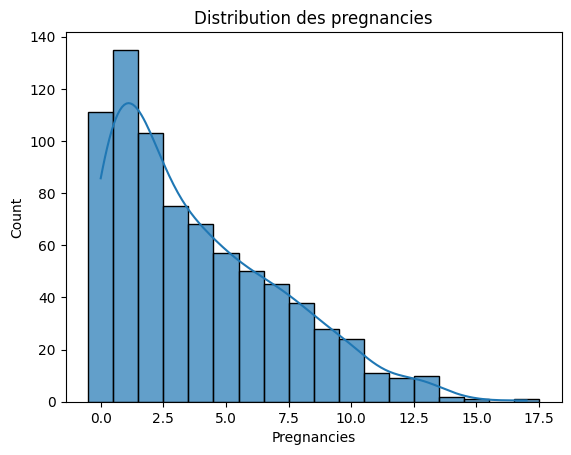

In [13]:
plt.title('Distribution des pregnancies')
sns.histplot(data=data,discrete=True, x='Pregnancies',shrink=1, kde=True, alpha=0.7)
plt.show()

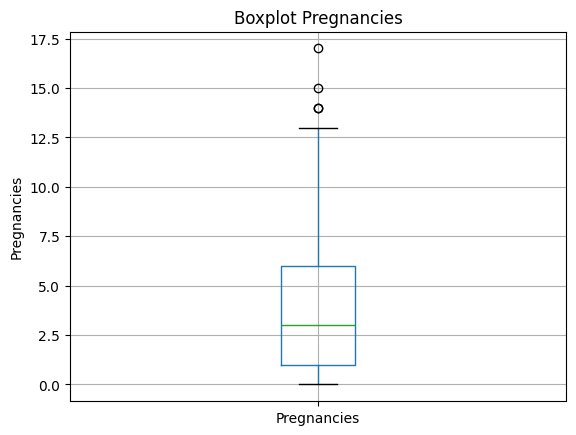

In [14]:
data.boxplot(column=['Pregnancies'])
plt.title('Boxplot Pregnancies')
plt.ylabel('Pregnancies')
plt.show()

Glucose 

Glycémie à jeun :
La plupart des datasets (comme le Pima Diabetes) utilisent la glycémie à jeun (mesurée après 8h sans manger).

Plages normales :

Normal : 70–99 mg/dL

Prédiabète : 100–125 mg/dL

Diabète : ≥ 126 mg/dL (confirmé par 2 tests)

Valeurs extrêmes dans vos données (0–199) :

0 mg/dL : Erreur évidente (incompatible avec la vie).

199 mg/dL : Signale un diabète probable (seuil diagnostic courant : ≥ 126 mg/dL à jeun).



In [15]:
data['Glucose'].value_counts().sort_index()

Glucose
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: count, Length: 136, dtype: int64

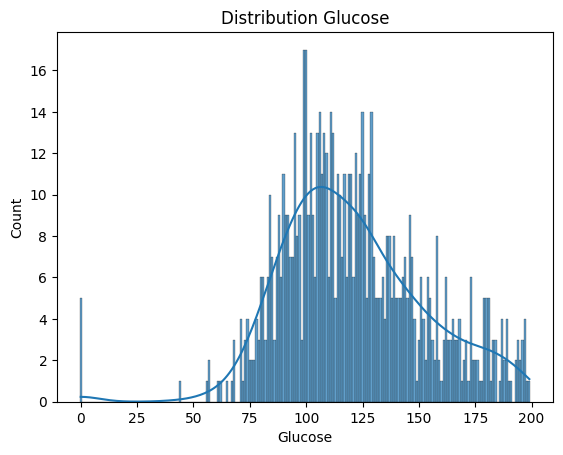

In [16]:
plt.title('Distribution Glucose')
sns.histplot(data=data,discrete=True, x='Glucose',shrink=1, kde=True, alpha=0.7)
plt.show()

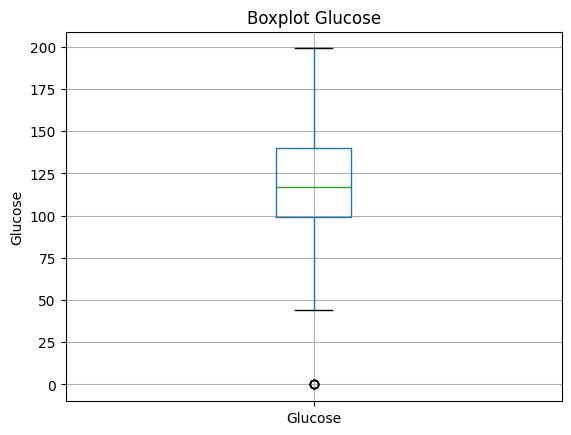

In [17]:
data.boxplot(column=['Glucose'])
plt.title('Boxplot Glucose')
plt.ylabel('Glucose')
plt.show()

BloodPressure

représente très probablement la pression artérielle diastolique (le chiffre du bas, par exemple "80" dans "120/80"), mesurée en mmHg (millimètres de mercure). Voici comment interpréter les valeurs entre 0 et 122 mmHg


0 mmHg :

Physiquement impossible (même en cas d'arrêt cardiaque, la pression ne tombe pas à 0).

Doit être traité comme une donnée manquante/erreur.

1–59 mmHg :

Hypotension dangereuse (sauf pour certains athlètes très entraînés).

Peut indiquer une erreur de mesure (ex. capteur défectueux).

≥90 mmHg :

Hypertension (facteur de risque pour le diabète et les maladies cardiaques).

> 120 urgences

In [18]:
data['BloodPressure'].value_counts().sort_index()

BloodPressure
0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: count, dtype: int64

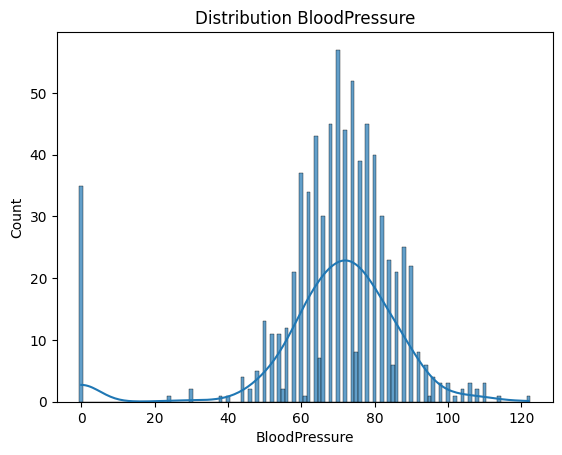

In [19]:
plt.title('Distribution BloodPressure')
sns.histplot(data=data,discrete=True, x='BloodPressure',shrink=1, kde=True, alpha=0.7)
plt.show()

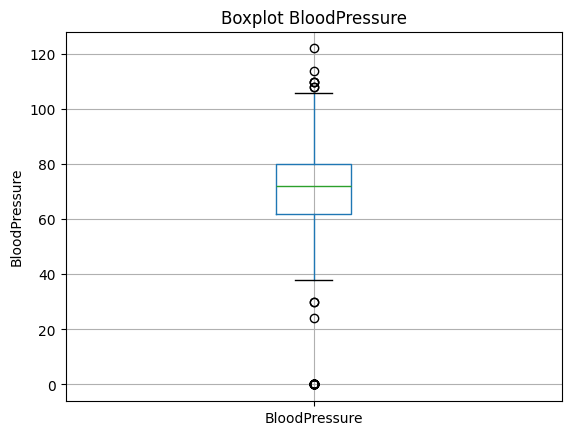

In [20]:
data.boxplot(column=['BloodPressure'])
plt.title('Boxplot BloodPressure')
plt.ylabel('BloodPressure')
plt.show()

SkinThickness

SkinThickness représente généralement l'épaisseur d'un pli cutané
Un pli cutané épais peut suggérer une adiposité excessive, un facteur de risque connu pour le diabète.
Dans certains jeux de données (comme celui de Pima), des valeurs à 0 peuvent être incohérentes (une épaisseur nulle est impossible). Cela peut indiquer des données manquantes mal encodées

Plage normale : Entre 5 mm et 60 mm environ, selon l'âge, le sexe et le niveau d'adiposité.

Exemple : Une personne mince pourrait avoir une épaisseur de 5–15 mm, tandis qu'une personne obèse pourrait dépasser 30–40 mm.

Seuil critique : Dans les jeux de données comme celui des Pima, des valeurs inférieures à 5 mm sont rarement plausibles (sauf chez les enfants ou individus très maigres).

Exemples de références :

Personne mince : 5–15 mm

Surpoids : 20–30 mm

Obésité morbide : 30–60 mm (au maximum).

In [21]:
data['SkinThickness'].value_counts().sort_index()

SkinThickness
0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23     22
24     12
25     16
26     16
27     23
28     20
29     17
30     27
31     19
32     31
33     20
34      8
35     15
36     14
37     16
38      7
39     18
40     16
41     15
42     11
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
Name: count, dtype: int64

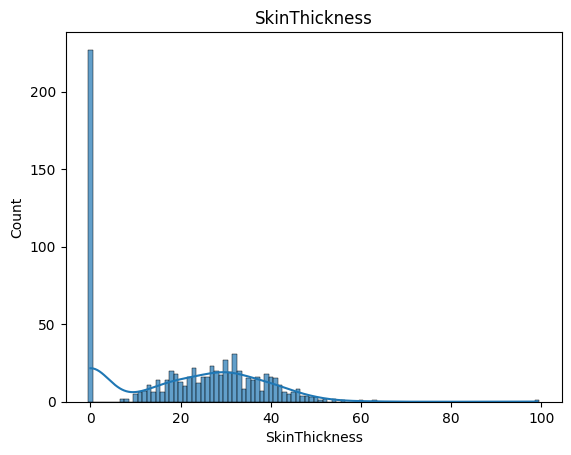

In [22]:
plt.title('SkinThickness')
sns.histplot(data=data,discrete=True, x='SkinThickness',shrink=1, kde=True, alpha=0.7)
plt.show()

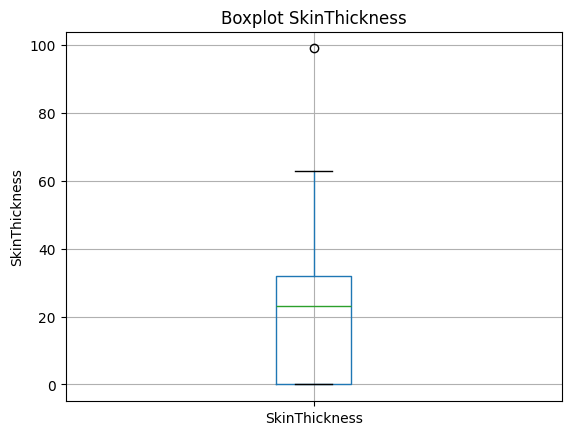

In [23]:
data.boxplot(column=['SkinThickness'])
plt.title('Boxplot SkinThickness')
plt.ylabel('SkinThickness')
plt.show()

Insulin

La variable Insulin (insuline) dans votre dataset représente très probablement la concentration d'insuline dans le sang, mesurée en μU/mL (micro-unités par millilitre).

0 μU/mL :

Non physiologique (même à jeun, l'insuline ne tombe jamais à 0).

Doit être traité comme une donnée manquante.

Valeurs 1–24 μU/mL :

Normales à jeun, mais 1 μU/mL est suspect (trop bas).

Valeurs >100 μU/mL :

Associées à une résistance à l'insuline (prédiabète/diabète type 2).

In [24]:
data['Insulin'].value_counts().sort_index()

Insulin
0      374
14       1
15       1
16       1
18       2
      ... 
579      1
600      1
680      1
744      1
846      1
Name: count, Length: 186, dtype: int64

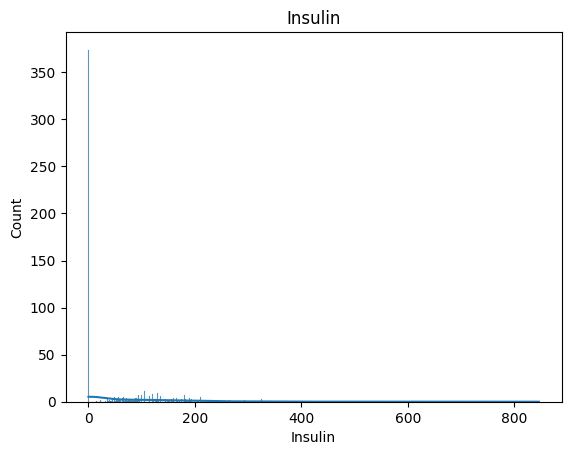

In [25]:
plt.title('Insulin')
sns.histplot(data=data,discrete=True, x='Insulin',shrink=1, kde=True, alpha=0.7)
plt.show()

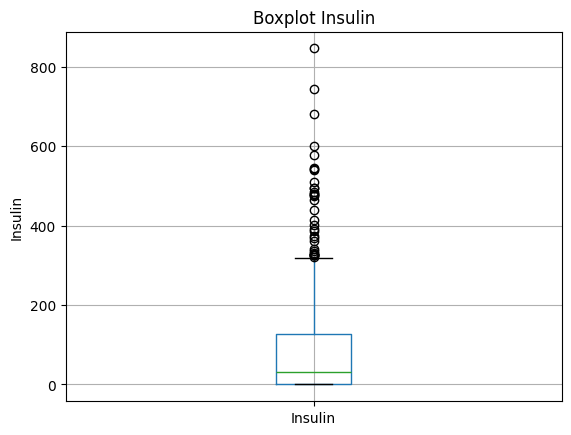

In [26]:
data.boxplot(column=['Insulin'])
plt.title('Boxplot Insulin')
plt.ylabel('Insulin')
plt.show()

BMI

La variable BMI (Indice de Masse Corporelle) est un indicateur clé pour évaluer le risque de diabète. Voici comment interpréter les valeurs entre 0 et 67.1 dans votre dataset

0	Erreur	Donnée impossible
< 16	Dénutrition grave	Urgence médicale
16–18.5	Maigreur	Risque de carences
18.5–25	Poids normal	Risque faible
25–30	Surpoids	Risque modéré de diabète
30–35	Obésité classe I	Risque élevé
35–40	Obésité classe II	Risque très élevé
> 40	Obésité classe III	Risque critique (diabète, MCV)


In [27]:
data['BMI'].value_counts().sort_index()

BMI
0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Name: count, Length: 248, dtype: int64

test